#  Q1

## Reference code for a simple perceptron

In [1202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [1203]:
df = pd.read_csv('~/Downloads/admissions.csv')
predictors = df[df.columns[1:8]]
prd = predictors#.drop(["TOEFL Score","University Rating","SOP","LOR ","Research","CGPA","GRE Score"],axis=1)
norm = (prd-prd.min())/(prd.max()-prd.min())
data_array = norm.values
chances = df.iloc[:,-1]
chances_array = chances.values
data_array.shape[1]

7

In [1204]:
class simple_perceptron():
    def __init__(self,input_dim,output_dim,learning_rate=0.01,activation=lambda x:x,activation_grad=lambda x:1):
        
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.activation=activation
        self.activation_grad=activation_grad
        self.lr=learning_rate
        ### initialize parameters ###
        self.weights=np.random.rand(self.input_dim)
        self.biases=np.random.rand(1)

    def predict(self,X):
        if len(X.shape)==1:
            X=X.reshape((1,-1))
        dim=X.shape[1]
        # Check that the dimension of accepted input data is the same as expected
        if not dim==self.input_dim:
            raise Exception("Expected input size %d, accepted %d!"%(self.input_dim,dim))
        # Calculate logit and activation
        #print(X,"h",self.weights.T,"g",self.biases)
        self.z = X.dot(self.weights.T) + self.biases   #shape(X.shape[0],1)
        #print(self.z,"jiji",self.z.shape)
        self.a = self.activation(self.z)             #shape(X.shape[0],1) 
        return self.a
    
    def fit(self,X,y):
        # Transform the single-sample data into 2-dimensional, for the convenience of matrix multiplication
        if len(X.shape)==1:
            X=X.reshape((1,-1))
        if len(y.shape)==1:
            y=y.reshape((1,-1))
        errors=self.evaluate(X,y)*self.activation_grad(self.z)
        #errors=(self.predict(X)-y).mean()*self.activation_grad(self.z)
        weights_grad=errors*(X.mean(axis=0))
        bias_grad=errors
        # Update weights and biases from the gradient
        self.weights= self.weights - self.lr*weights_grad
        self.biases= self.biases - self.lr*bias_grad

        
    def train_on_epoch(self,X,y,batch_size=4):
        # Every time select batch_size samples from the training set, until all data in the training set has been trained once
        order=list(range(X.shape[0]))
        random.shuffle(order)
        n=0
        while n<math.ceil(len(order)/batch_size)-1: # Parts that can fill one batch
            self.fit(X[order[n*batch_size:(n+1)*batch_size]],y[order[n*batch_size:(n+1)*batch_size]])
            n+=1
        # Parts that cannot fill one batch
        self.fit(X[order[n*batch_size:]],y[order[n*batch_size:]])
        
    def evaluate(self,X,y):
         # Transform the single-sample data into 2-dimensional
        if len(X.shape)==1:
            X=X.reshape((1,-1))
        if len(y.shape)==1:
            y=y.reshape((1,-1))
        ### means square error ###
        print(self.predict(X),"k",y,"j",self.predict(X)-y)
        #print(self.predict(X)-y,"j",np.square(self.predict(X)-y),"kk",(np.square(self.predict(X)-y)).mean())
        return (np.square(self.predict(X)-y)).mean()
    
    def get_weights(self):
        return (self.weights,self.biases)
    
    def set_weights(self,weights):
        self.weights=weights[0]
        self.biases=weights[1]

[1.30230169 3.05627676 1.47700326 2.95796652] k [[0.7  0.94 0.78 0.86]] j [[0.60230169 2.11627676 0.69700326 2.09796652]]
[2.81208197 0.68036146 0.58475505 1.94669194] k [[0.88 0.56 0.59 0.74]] j [[ 1.93208197  0.12036146 -0.00524495  1.20669194]]
[1.24593821 1.13731337 1.6784358  1.95241155] k [[0.54 0.62 0.5  0.74]] j [[0.70593821 0.51731337 1.1784358  1.21241155]]
[1.26441185 1.20832985 2.55215577 1.873491  ] k [[0.7  0.7  0.9  0.78]] j [[0.56441185 0.50832985 1.65215577 1.093491  ]]
[2.78272183 2.02213538 2.26969753 1.64149489] k [[0.97 0.79 0.9  0.72]] j [[1.81272183 1.23213538 1.36969753 0.92149489]]
[2.68979787 2.1702915  0.80068634 0.48676393] k [[0.94 0.71 0.62 0.49]] j [[ 1.74979787  1.4602915   0.18068634 -0.00323607]]
[1.59305532 1.00700941 2.17853    1.77072907] k [[0.72 0.66 0.82 0.79]] j [[0.87305532 0.34700941 1.35853    0.98072907]]
[0.66283272 1.54180633 0.92931657 2.18811429] k [[0.45 0.74 0.66 0.82]] j [[0.21283272 0.80180633 0.26931657 1.36811429]]
[1.77667263 2.22

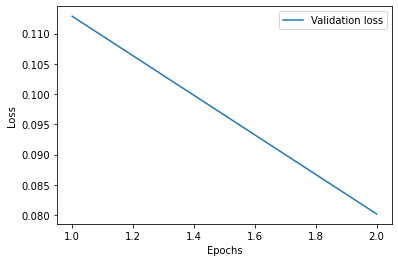

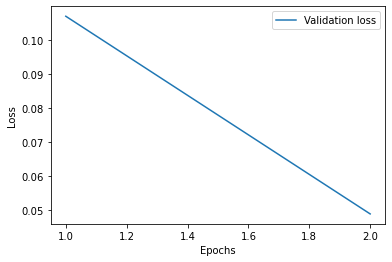

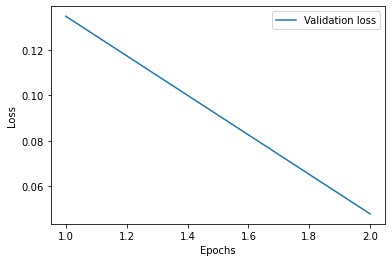

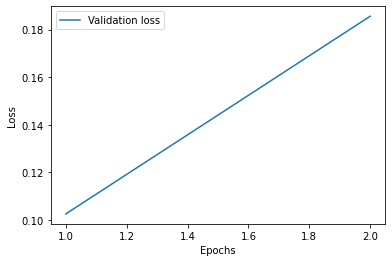

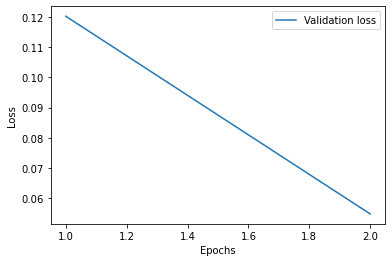

In [1205]:
from sklearn.model_selection import train_test_split,KFold


def Kfold(k,Xs,ys,epochs,learning_rate=0.01,draw_curve=True):
    # The total number of examples for training the network
    total_num=len(Xs)
    
    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    # record error for each model
    train_error_all=[]
    test_error_all=[]
    
    for train_selector,test_selector in kf.split(range(total_num)):
        # Decide training examples and testing examples for this fold
        train_Xs=Xs[train_selector]
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]
        

        val_array=[]
        # Split training examples further into training and validation
        train_in,val_in,train_real,val_real=train_test_split(train_Xs,train_ys)
        
        ### Establish the model here ###
        model=simple_perceptron(Xs.shape[1],1,learning_rate)
        
        # Save the lowest weights, so that we can recover the best model
        weights = model.get_weights()
        lowest_val_err = np.inf
        for epoch in range(epochs):
            # Train model on a number of epochs, and test performance in the validation set
            model.train_on_epoch(train_in,train_real)
            val_err = model.evaluate(val_in,val_real)
            val_array.append(val_err)
            if val_err < lowest_val_err:
                lowest_val_err = val_err
                weights = model.get_weights()

        # The final number of epochs is when the minimum error in validation set occurs    
        final_epochs=np.argmin(val_array)+1
        print("Number of epochs with lowest validation:",final_epochs)
        # Recover the model weight
        model.set_weights(weights)

        # Report result for this fold
        train_error=model.evaluate(train_Xs,train_ys)
        train_error_all.append(train_error)
        test_error=model.evaluate(test_Xs,test_ys)
        test_error_all.append(test_error)
        print("Train error:",train_error)
        print("Test error:",test_error)
        
        if draw_curve:
            plt.figure()
            plt.plot(np.arange(len(val_array))+1,val_array,label='Validation loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            
    print("Final results:")
    print("Training error:%f+-%f"%(np.average(train_error_all),np.std(train_error_all)))
    print("Testing error:%f+-%f"%(np.average(test_error_all),np.std(test_error_all)))
    
    # return the last model
    return model

last = Kfold(5,data_array,chances_array,2)

#print(abs(last.predict(data_array[102:122])-chances_array[102:122]).mean(axis=0))



[2.72812561 2.63220597 2.47984453 2.77788464] [[0.97 0.9  0.87 0.94]] j k [[1.75812561 1.73220597 1.60984453 1.83788464]]
[2.44661048 2.24750172 0.56438219 1.89341073] [[0.91 0.84 0.47 0.77]] j k [[1.53661048 1.40750172 0.09438219 1.12341073]]
[0.89601899 0.6805948  1.77280482 1.63722901] [[0.65 0.58 0.79 0.76]] j k [[0.24601899 0.1005948  0.98280482 0.87722901]]
[2.15072907 0.78828809 2.01492002 1.65752592] [[0.78 0.38 0.85 0.73]] j k [[1.37072907 0.40828809 1.16492002 0.92752592]]
[1.80528388 1.12010102 2.28088804 2.33427164] [[0.74 0.67 0.96 0.87]] j k [[1.06528388 0.45010102 1.32088804 1.46427164]]
[1.24741139 1.45974571 1.66872919 1.32015354] [[0.7  0.67 0.75 0.66]] j k [[0.54741139 0.78974571 0.91872919 0.66015354]]
[1.74123215 1.09641647 1.91408115 0.30652442] [[0.65 0.34 0.91 0.42]] j k [[ 1.09123215  0.75641647  1.00408115 -0.11347558]]
[2.01741414 1.20691967 0.74536963 1.76980226] [[0.96 0.45 0.42 0.74]] j k [[1.05741414 0.75691967 0.32536963 1.02980226]]
[1.28682938 1.053552

/var/folders/lp/p_fjrj654p734sb65s21gfcm0000gp/T/ipykernel_53744/248903179.py:62: RuntimeWarning: overflow encountered in square
  return (np.square(self.predict(X)-y)).mean()


 [[nan nan nan nan]]
[nan nan nan nan] [[0.82 0.82 0.7  0.82]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.67 0.73 0.6  0.79]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.87 0.68 0.59 0.77]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.77 0.45 0.77 0.47]] j k [[nan nan nan nan]]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan] [[0.7  0.83 0.54 0.55 0.71 0.76 0.93 0.65 0.84 0.38 0.54 0.75 0.93 0.76
  0.78 0.52 0.74 0.86 0.94 0.81 0.76 0.68 0.96 0.68 0.53 0.93 0.71 0.68
  0.73 0.81 0.64 0.84 0.9  0.72 0.55 0.63 0.71 0.57 0.93 0.68 0.91 0.74
  0.93 0.68 0.74 0.47 0.61 0.77 0.69 0.93 0.8  0.67 0.92 0.86 0.7  0.92
  0.94 0.91 0.73 0.8

/var/folders/lp/p_fjrj654p734sb65s21gfcm0000gp/T/ipykernel_53744/248903179.py:62: RuntimeWarning: overflow encountered in square
  return (np.square(self.predict(X)-y)).mean()


 [[0.67 0.65 0.64 0.8 ]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.94 0.84 0.77 0.79]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.94 0.78 0.64 0.86]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.65 0.65 0.96 0.82]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.79 0.95 0.61 0.87]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.38 0.66 0.52 0.96]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.8  0.93 0.83 0.74]] j k [[nan nan nan nan]]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan] [[0.93 0.75 0.94 0.73 0.76 0.69 0.72 0.7  0.79 0.61 0.56 0.73 0.82 0.91
  0.72 0.74 0.92 0.62 0.94 0.95 0.78 0.54 0.79 0.62 0.54 0.78 0.5  0.93
  0.

/var/folders/lp/p_fjrj654p734sb65s21gfcm0000gp/T/ipykernel_53744/248903179.py:62: RuntimeWarning: overflow encountered in square
  return (np.square(self.predict(X)-y)).mean()


[nan nan nan nan] [[0.94 0.78 0.96 0.54]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.9  0.9  0.87 0.72]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.8  0.73 0.45 0.82]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.63 0.79 0.78 0.66]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.76 0.94 0.64 0.67]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.73 0.75 0.54 0.52]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.65 0.93 0.42 0.71]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.71 0.74 0.38 0.92]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.65 0.7  0.71 0.61]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.57 0.81 0.93 0.94]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.37 0.71 0.79 0.78]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.81 0.89 0.71 0.84]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.96 0.52 0.87 0.62]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.42 0.49 0.75 0.71]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.61 0.86 0.87 0.68]] j k [[nan nan nan nan]]
[nan nan n

/var/folders/lp/p_fjrj654p734sb65s21gfcm0000gp/T/ipykernel_53744/248903179.py:62: RuntimeWarning: overflow encountered in square
  return (np.square(self.predict(X)-y)).mean()


j k [[nan nan nan nan]]
[nan nan nan nan] [[0.58 0.95 0.61 0.39]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.97 0.64 0.64 0.54]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.7  0.87 0.61 0.93]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.92 0.34 0.57 0.96]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.64 0.76 0.68 0.74]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.59 0.79 0.89 0.51]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.7  0.78 0.44 0.79]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.89 0.71 0.8  0.89]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.64 0.52 0.56 0.58]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.67 0.78 0.53 0.49]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.59 0.84 0.94 0.87]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.57 0.46 0.57 0.64]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.48 0.59 0.74 0.83]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.54 0.82 0.79 0.75]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.79 0.43 0.79 0.83]] j k [[nan 

/var/folders/lp/p_fjrj654p734sb65s21gfcm0000gp/T/ipykernel_53744/248903179.py:62: RuntimeWarning: overflow encountered in square
  return (np.square(self.predict(X)-y)).mean()


[nan nan nan nan] [[0.79 0.52 0.76 0.86]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.9  0.75 0.8  0.84]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.71 0.67 0.71 0.84]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.92 0.57 0.76 0.69]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.81 0.82 0.82 0.76]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.7  0.45 0.44 0.57]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.64 0.93 0.8  0.64]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.94 0.77 0.73 0.76]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.78 0.64 0.92 0.91]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.68 0.92 0.97 0.77]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.76 0.9  0.65 0.66]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.68 0.67 0.61 0.74]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.44 0.61 0.89 0.59]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.57 0.73 0.97 0.57]] j k [[nan nan nan nan]]
[nan nan nan nan] [[0.72 0.6  0.9  0.74]] j k [[nan nan nan nan]]
[nan nan n

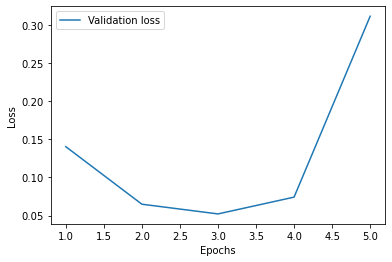

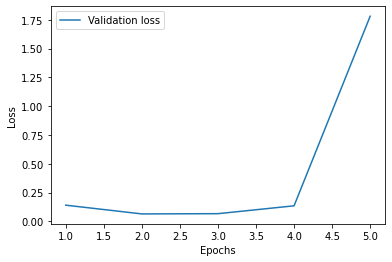

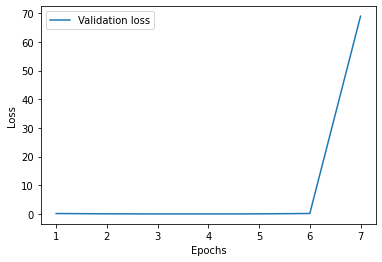

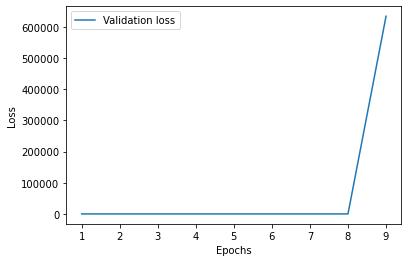

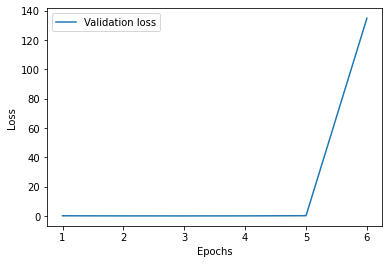

In [1197]:
prd = predictors.drop(["GRE Score"],axis=1)
norm = (prd-prd.min())/(prd.max()-prd.min())
data_array = norm.values
chances = df.iloc[:,-1]
chances_array = chances.values
no_GRE = Kfold(5,data_array,chances_array,25)

#### The features are a pretty good indicator of getting into grad school when choosing certain parameters. I kept getting validation errors of about 0.01 when doing min-max normalization, backprop using mean absolute error, initialized weights between 0 and 0.05, a learning rate of 0.01, 25 epochs and 5 folds. When doing the hyperparameters asked for in the question, the prediction rate was basically a coin toss, with validation errors of around 50-60% (probably due to under/overfitting of some sort). Removing GRE seemed to increase the validation error by a bit, indicating that it has a small but nonzero importance

## A funtion that plots the correlation between your prediction and the groud truth

In [1198]:
def show_correlation(xs,ys):
    plt.figure()
    plt.scatter(xs,ys,s=0.5)
    r = [np.min([np.min(xs),np.min(ys)]),np.max([np.max(xs),np.max(ys)])]
    plt.plot(r,r,'r')
    plt.xlabel("Predictions")
    plt.ylabel("Ground truth")
    corr=np.corrcoef([xs,ys])[1,0]
    print("Correlation coefficient:",corr)





# Q3

In [1199]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_X(number):
    xs=(np.random.random(number)*2-1)*10
    return xs
    
def generate_data(number,stochascity=0.05):
    xs=generate_X(number)
    fs=3*np.sin(xs)-5
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return xs,fs*stochastic_ratio

This is your training data:

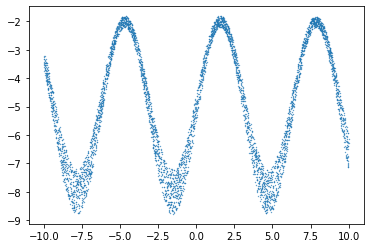

In [1200]:
x,y=generate_data(5000,0.1)
plt.scatter(x,y,s=0.1)

## (b)

Here we use the Multi-layer Perceptron regressor built-in from sklearn as a simple ANN <br>
[MLP regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [1201]:
from sklearn.neural_network import MLPRegressor

def KFold_NN(k,Xs,ys,hidden_layers,epochs=1000,lr=0.001,):
    # The total number of examples for training the network
    total_num=len(Xs)

    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    train_error_all=[]
    test_error_all=[]
    for train_selector,test_selector in kf.split(range(total_num)):
        # Decite training examples and testing examples for this fold
        train_Xs=Xs[train_selector]
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]
        
        # Establish the model here
        model = MLPRegressor(max_iter=epochs, activation='tanh', early_stopping=True, 
                             validation_fraction=0.25, learning_rate='constant', learning_rate_init=lr,
                             hidden_layer_sizes=hidden_layers).fit(train_Xs, train_ys)
        
        ### Report result for this fold ##
        train_error=...
        train_error_all.append(train_error)
        test_error=...
        test_error_all.append(test_error)
        print("Train error:",train_error)
        print("Test error:",test_error)

    print("Final results:")
    print("Training error:%f+-%f"%(np.average(train_error_all),np.std(train_error_all)))
    print("Testing error:%f+-%f"%(np.average(test_error_all),np.std(test_error_all)))
    
    # return the last model
    return model
